In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

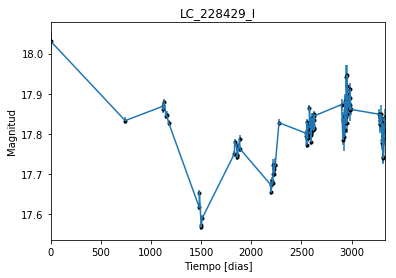

In [2]:
data = np.genfromtxt('LC_228429_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_228429_I')
plt.savefig("LC_228429_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

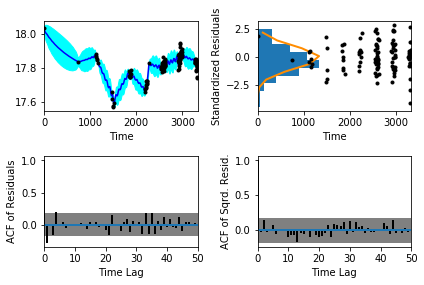

In [6]:
sample.assess_fit()

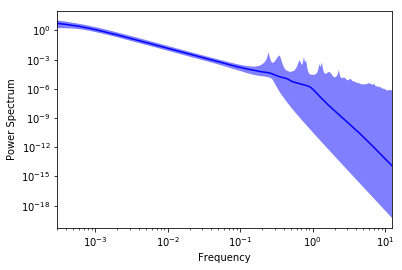

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

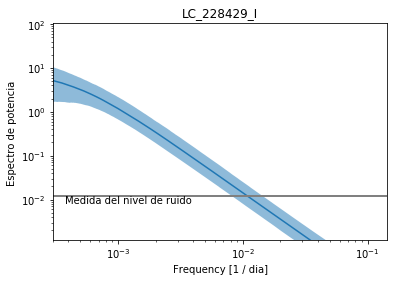

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_228429_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_228429_I')

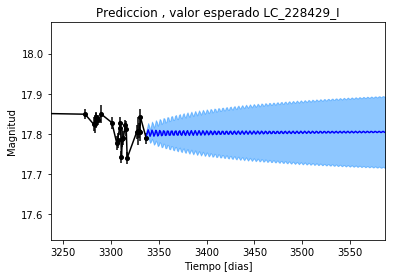

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_228429_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_228429_I')

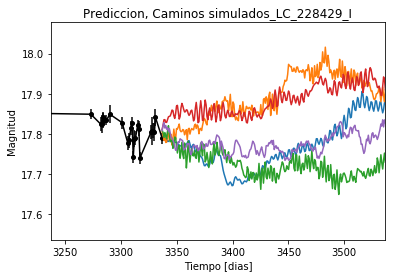

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_228429_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


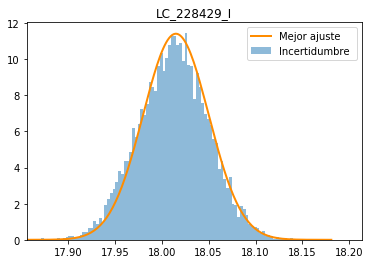

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_228429_I')
plt.savefig("Mejor_ajuste_LC_228429_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_228429_I')

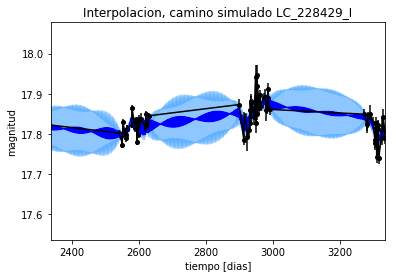

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228429_I')

Text(0.5,1,'Interpolacion, camino simulado LC_228429_I')

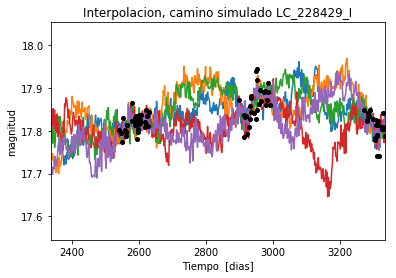

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228429_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 306.36059234
Median: 0.0149018545393
Standard deviation: 1.44881426353
68% credibility interval: [ 0.00737056  0.03419667]
95% credibility interval: [  1.36063039e-03   1.83246266e+00]
99% credibility interval: [  5.28012839e-04   1.25145794e+01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 324.858175357
Median: 0.014900139863
Standard deviation: 1.35070756721
68% credibility interval: [ 0.00737056  0.03407438]
95% credibility interval: [  1.36063039e-03   1.61546017e+00]
99% credibility interval: [  5.26435942e-04   1.20145547e+01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 235.4970639
Median: 4.52431716757
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 797.930739442
Median: 325.682353962
Standard deviation: 2.22319122972
68% credibility interval: [ 323.1834117   327.39253462]
95% credibility interval: [ 320.00408779  328.66929611]
99% credibility interval: [ 317.75067281  329.24890946]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 120.995524386
Median: 31.5104231573
Standard deviation: 45.8755637943
68% credibility interval: [  2.56119171  98.90695722]
95% credibility interval: [   0.23491991  146.63146802]
99% credibility interval: [  1.06800678e-01   1.82518983e+02]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 237.366991888
Median: 28.7800396196
Standard deviation: 3772.23650966
68% credibility interval: [   6.06268229  814.59951534]
95% credibility interval

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 5.17509371362e-19
Standard deviation: 9.55746161392e+33
68% credibility interval: [  1.88037112e-43   4.15579023e-01]
95% credibility interval: [  2.49538901e-61   1.78161298e+02]
99% credibility interval: [  2.93347581e-133   2.44229808e+019]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 786.656994819
Median: 17.8286626333
Standard deviation: 0.048459649372
68% credibility interval: [ 17.78402114  17.87541595]
95% credibility interval: [ 17.73285911  17.92506272]
99% credibility interval: [ 17.69161232  17.96358062]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 182.861773322
Median: 0.681664436647
Standard deviation: 4.55243079794
68% credibility interval: [ 0.25093038  3.82234124]
95% credibility interval: [  0.23753701  17.37914491]
99% credibility interval: [  0.19504537  23.46759886]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 182.861773322
Median: 0.681664436647
Standard deviation: 4.55243079794
68% credibility interval: [ 0.25093038  3.82234124]
95% credibility interval: [  0.23753701  17.37914491]
99% credibility interval: [  0.19504537  23.46759886]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1062.56685423
Median: 0.0
Standard deviation: 0.000136906596061
68

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 797.930739442
Median: 325.682353962
Standard deviation: 2.22319122972
68% credibility interval: [ 323.1834117   327.39253462]
95% credibility interval: [ 320.00408779  328.66929611]
99% credibility interval: [ 317.75067281  329.24890946]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 384.804193131
Median: 0.0106053266911
Standard deviation: 0.00457327461121
68% credibility interval: [ 0.00760295  0.01468986]
95% credibility interval: [ 0.00529133  0.02018854]
99% credibility interval: [ 0.00414513  0.02626138]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 163.826268431
Median: 1.29645115531
Standard deviation: 0.269006941149
68% credibility interval: [ 1.04397138  1.60781018]
95% credibility interval: [ 0.85363176  1.8765495 ]
99% credibility interval: [ 0.75526096  1.97499055]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 525.878671175
Median: 3.76907871093
Standard deviation: 1395.36101974
68% credibility interval: [  0.13122854  96.25811879]
95% credibility interval: [  1.78923644e-03   3.38653132e+03]
99% credibility interval: [  1.09319404e-21   1.12630799e+04]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 306.36059234
Median: (-0.0936311134911-42.7362221252j)
Standard deviation: 30.017380353
68% credibility interval: [-0.21486401 -42.16756389j -0.04631061-102.85347664j]
95% credibility interval: [ -1.15137024e+01-44.02086549j  -8.54909286e-03 -1.53604337j]
99% credibility interval: [ -7.86314212e+01-102.24846575j  -3.31760251e-03  -1.55647081j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 324.858175357
Median: (-0.0936203398624+16.5757436631j)
Standard deviation: 29.8362246823
68% credibility interval: [-0.21409564  +1.73556717j -0.04631061+102.85347664j]
95% credibility interval: [ -1.01502356e+01+2.00970678j  -8.54909286e-03+1.53604337j]
99% credibility interval: [ -7.54896737e+01+57.80075903j  -3.30769458e-03 +1.5